In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      1.00      0.99        98

    accuracy                           0.98       100
   macro avg       0.49      0.50      0.49       100
weighted avg       0.96      0.98      0.97       100

Mean Squared Error: 0.02


c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


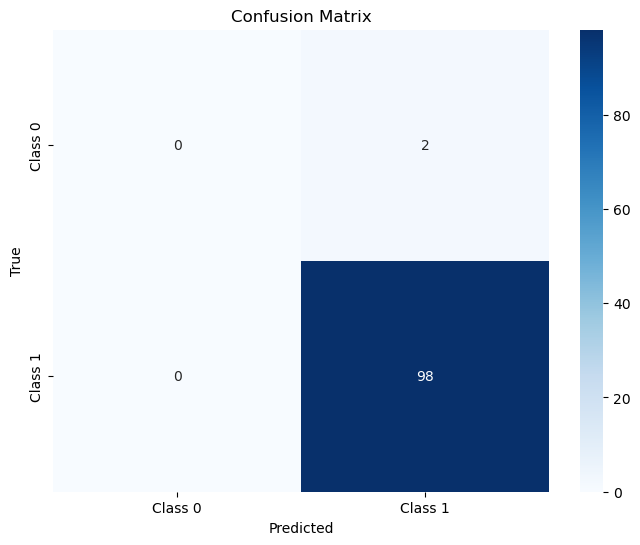

In [8]:
np.random.seed(42)
X=np.linspace(-10, 10, 1000).reshape(-1, 2)  # 1000 samples with 2 features
y = 0.5 * X[:, 0]**2 + 0.5 * X[:, 1]**2 + np.random.normal(0, 1, size=X.shape[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
Y_train = (y_train > 0).astype(int)  # Binary classification
Y_test = (y_test > 0).astype(int)  # Binary classification
model = LogisticRegression()
model.fit(X_train_poly, Y_train)
y_pred = model.predict(X_test_poly)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(Y_test, y_pred))
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


MSE= mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {MSE:.2f}")
